# ML HW1 | Supervised Learning | Boosting
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

## Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

## Set directory

In [31]:
directory = "/Users/michaelpecorino/Documents/GitLab/ncaa/"

## Load inputs

In [32]:
ncaa_all = pd.read_csv(directory + "ncaa_all.csv")
train = pd.read_csv(directory + "ncaa_train.csv")
valid = pd.read_csv(directory + "ncaa_valid.csv")
test = pd.read_csv(directory + "ncaa_test.csv")

## Define features and response variable

### Features

In [33]:
features = ["game_win_perc_prop", 
            "game_starters_total_minutes_prop", "game_starters_prop_minutes_prop", "game_player_pts_10plus_prop",
            "game_player_pts_15plus_prop", "game_player_pts_16plus_prop", "game_player_pts_17plus_prop",
            "game_player_pts_18plus_prop", "game_player_pts_19plus_prop", "game_player_pts_20plus_prop",
            "game_player_pts_21plus_prop", "game_player_pts_22plus_prop", "game_player_ast_3plus_prop",
            "game_player_ast_5plus_prop", "game_player_ast_7plus_prop",
            "game_player_orb_1plus_prop", "game_player_orb_2plus_prop", "game_player_orb_3plus_prop",
            "game_player_drb_5plus_prop", "game_player_drb_7plus_prop", "game_player_drb_10plus_prop",
            "game_gs_mean_prop", "game_gs_max_prop", "game_pos_prop", "game_pts_prop", "game_efficiency_prop",
            "game_fg_attempted_prop", "game_ft_attempted_prop", "game_ft_made_prop", "game_stl_prop",
            "game_tov_prop","game_stl_tov_ratio_diff", "game_stl_tov_ratio_prop", "game_blk_prop",
            "game_orb_prop", "game_drb_prop", "game_trb_prop", "game_ast_prop", "game_pf_diff", "game_pf_prop",
            "home_indicator.x", "neutral_indicator"]
ncaa_all_features = ncaa_all[features]
train_features = train[features]
valid_features = valid[features]
train_valid_features = train_features.append(valid_features)
test_features = test[features]

### Response variable

In [34]:
response_variable = "win_indicator"
ncaa_all_response = ncaa_all[response_variable]
train_response = train[response_variable]
valid_response = valid[response_variable]
train_valid_resposnse = train_response.append(valid_response)
test_response = test[response_variable]

## Boosted trees

In [35]:
xgboost_model = GradientBoostingClassifier(loss = 'exponential', #deviance, exponential,
                                           learning_rate = 0.08,
                                           n_estimators = 100,
                                           subsample = 1.0,
                                           criterion = 'friedman_mse',
                                           min_samples_split = 2,
                                           min_samples_leaf = 1,
                                           min_weight_fraction_leaf = 0.0,
                                           max_depth = 3,
                                           min_impurity_decrease = 0.0,
                                           min_impurity_split = None,
                                           init = None,
                                           random_state = 1,
                                           max_features = None,
                                           verbose = 2,
                                           max_leaf_nodes = None,
                                           warm_start = False
                                           #presort = 'auto',
                                           #validation_fraction = 0.1,
                                           #n_iter_no_change = None,
                                           #tol = 0.0001
                                          )

xgboost_model.fit(train_features, train_response) 

print("XGBoost accuracy on training data: ", xgboost_model.score(train_features, train_response))
print("XGBoost accuracy on validation data: ", xgboost_model.score(valid_features, valid_response))

      Iter       Train Loss   Remaining Time 
         1           0.9850           46.47s
         2           0.9718           38.48s
         3           0.9601           35.84s
         4           0.9498           34.34s
         5           0.9407           33.25s
         6           0.9326           32.50s
         7           0.9255           31.76s
         8           0.9189           31.19s
         9           0.9133           30.65s
        10           0.9081           30.19s
        11           0.9037           29.69s
        12           0.8997           29.44s
        13           0.8962           28.96s
        14           0.8931           28.50s
        15           0.8902           28.23s
        16           0.8876           27.95s
        17           0.8852           27.64s
        18           0.8832           27.23s
        19           0.8811           26.91s
        20           0.8792           26.46s
        21           0.8775           26.05s
        2

### Grid search

In [36]:
folds = set(train['fold'])
folds

{1, 2, 3, 4, 5}

In [12]:
xgb_results = pd.DataFrame(columns = ['learning_rate', 'min_samples_split', 'max_depth', 'fold',
                                      'in_fold_accuracy', 'out_fold_accuracy'])

min_samples_splits = [2, 10, 50, 100]
max_depths = [3, 4, 5, 6]
learning_rates = [.02, .075, .150, .2]
for min_samples_split in min_samples_splits:
    for max_depth in max_depths:
        for learning_rate in learning_rates:
            for fold in folds:
                
                #Debugging
                #min_samples_split = 2
                #max_depth = 3
                #learning_rate = .02
                #fold = 1
        
                train_features_in_fold = train[train["fold"] != fold][features]
                train_response_in_fold = train[train["fold"] != fold][response_variable]

                test_features_out_fold = train[train["fold"] == fold][features]
                test_response_out_fold = train[train["fold"] == fold][response_variable]
            
                print("Modeling fold", fold, "with min_samples_split:", min_samples_split,
                      ", max_depth:", max_depth,
                      ", and learning_rate:", learning_rate)

                xgboost_model = GradientBoostingClassifier(loss = 'exponential', #deviance, exponential,
                                                           learning_rate = learning_rate,
                                                           n_estimators = 500,
                                                           subsample = 1.0,
                                                           criterion = 'friedman_mse',
                                                           min_samples_split = min_samples_split,
                                                           min_samples_leaf = 1,
                                                           min_weight_fraction_leaf = 0.0,
                                                           max_depth = max_depth,
                                                           min_impurity_decrease = 0.0,
                                                           min_impurity_split = None,
                                                           init = None,
                                                           random_state = 28,
                                                           max_features = None,
                                                           #verbose = 1,
                                                           max_leaf_nodes = None,
                                                           warm_start = False,
                                                           #presort = 'auto',
                                                           validation_fraction = 0.25,
                                                           n_iter_no_change = 25,
                                                           #tol = 0.0001
                                                          )
                xgboost_model.fit(train_features_in_fold, train_response_in_fold) 

                in_fold_accuracy = xgboost_model.score(train_features_in_fold, train_response_in_fold)
                out_fold_accuracy = xgboost_model.score(test_features_out_fold, test_response_out_fold)

                xgb_results = xgb_results.append({'learning_rate': learning_rate,
                                                  'min_samples_split': min_samples_split,
                                                  'max_depth': max_depth,
                                                  'fold': fold,
                                                  'in_fold_accuracy': in_fold_accuracy,
                                                  'out_fold_accuracy': out_fold_accuracy},
                                                ignore_index = True)
                print(xgb_results, "\n")

Modeling with min_samples_split: 2 , max_depth: 3 , and learning_rate: 0.02
   learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.02                2.0        3.0   1.0           0.71808   

   out_fold_accuracy  
0           0.710868   

Modeling with min_samples_split: 2 , max_depth: 3 , and learning_rate: 0.02
   learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.02                2.0        3.0   1.0          0.718080   
1           0.02                2.0        3.0   2.0          0.717733   

   out_fold_accuracy  
0           0.710868  
1           0.709365   

Modeling with min_samples_split: 2 , max_depth: 3 , and learning_rate: 0.02
   learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.02                2.0        3.0   1.0          0.718080   
1           0.02                2.0        3.0   2.0          0.717733   
2           0.02                2.0        3.0   3.0       

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.718080   
1           0.020                2.0        3.0   2.0          0.717733   
2           0.020                2.0        3.0   3.0          0.717939   
3           0.020                2.0        3.0   4.0          0.719796   
4           0.020                2.0        3.0   5.0          0.719229   
5           0.075                2.0        3.0   1.0          0.718183   
6           0.075                2.0        3.0   2.0          0.719486   
7           0.075                2.0        3.0   3.0          0.722271   
8           0.075                2.0        3.0   4.0          0.722477   
9           0.075                2.0        3.0   5.0          0.721033   
10          0.150                2.0        3.0   1.0          0.720245   
11          0.150                2.0        3.0   2.0          0.719074   

    out_fold_accuracy  


    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.718080   
1           0.020                2.0        3.0   2.0          0.717733   
2           0.020                2.0        3.0   3.0          0.717939   
3           0.020                2.0        3.0   4.0          0.719796   
4           0.020                2.0        3.0   5.0          0.719229   
5           0.075                2.0        3.0   1.0          0.718183   
6           0.075                2.0        3.0   2.0          0.719486   
7           0.075                2.0        3.0   3.0          0.722271   
8           0.075                2.0        3.0   4.0          0.722477   
9           0.075                2.0        3.0   5.0          0.721033   
10          0.150                2.0        3.0   1.0          0.720245   
11          0.150                2.0        3.0   2.0          0.719074   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.718080   
1           0.020                2.0        3.0   2.0          0.717733   
2           0.020                2.0        3.0   3.0          0.717939   
3           0.020                2.0        3.0   4.0          0.719796   
4           0.020                2.0        3.0   5.0          0.719229   
5           0.075                2.0        3.0   1.0          0.718183   
6           0.075                2.0        3.0   2.0          0.719486   
7           0.075                2.0        3.0   3.0          0.722271   
8           0.075                2.0        3.0   4.0          0.722477   
9           0.075                2.0        3.0   5.0          0.721033   
10          0.150                2.0        3.0   1.0          0.720245   
11          0.150                2.0        3.0   2.0          0.719074   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.718080   
1           0.020                2.0        3.0   2.0          0.717733   
2           0.020                2.0        3.0   3.0          0.717939   
3           0.020                2.0        3.0   4.0          0.719796   
4           0.020                2.0        3.0   5.0          0.719229   
5           0.075                2.0        3.0   1.0          0.718183   
6           0.075                2.0        3.0   2.0          0.719486   
7           0.075                2.0        3.0   3.0          0.722271   
8           0.075                2.0        3.0   4.0          0.722477   
9           0.075                2.0        3.0   5.0          0.721033   
10          0.150                2.0        3.0   1.0          0.720245   
11          0.150                2.0        3.0   2.0          0.719074   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.718080   
1           0.020                2.0        3.0   2.0          0.717733   
2           0.020                2.0        3.0   3.0          0.717939   
3           0.020                2.0        3.0   4.0          0.719796   
4           0.020                2.0        3.0   5.0          0.719229   
5           0.075                2.0        3.0   1.0          0.718183   
6           0.075                2.0        3.0   2.0          0.719486   
7           0.075                2.0        3.0   3.0          0.722271   
8           0.075                2.0        3.0   4.0          0.722477   
9           0.075                2.0        3.0   5.0          0.721033   
10          0.150                2.0        3.0   1.0          0.720245   
11          0.150                2.0        3.0   2.0          0.719074   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.718080   
1           0.020                2.0        3.0   2.0          0.717733   
2           0.020                2.0        3.0   3.0          0.717939   
3           0.020                2.0        3.0   4.0          0.719796   
4           0.020                2.0        3.0   5.0          0.719229   
5           0.075                2.0        3.0   1.0          0.718183   
6           0.075                2.0        3.0   2.0          0.719486   
7           0.075                2.0        3.0   3.0          0.722271   
8           0.075                2.0        3.0   4.0          0.722477   
9           0.075                2.0        3.0   5.0          0.721033   
10          0.150                2.0        3.0   1.0          0.720245   
11          0.150                2.0        3.0   2.0          0.719074   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.718080   
1           0.020                2.0        3.0   2.0          0.717733   
2           0.020                2.0        3.0   3.0          0.717939   
3           0.020                2.0        3.0   4.0          0.719796   
4           0.020                2.0        3.0   5.0          0.719229   
5           0.075                2.0        3.0   1.0          0.718183   
6           0.075                2.0        3.0   2.0          0.719486   
7           0.075                2.0        3.0   3.0          0.722271   
8           0.075                2.0        3.0   4.0          0.722477   
9           0.075                2.0        3.0   5.0          0.721033   
10          0.150                2.0        3.0   1.0          0.720245   
11          0.150                2.0        3.0   2.0          0.719074   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.718080   
1           0.020                2.0        3.0   2.0          0.717733   
2           0.020                2.0        3.0   3.0          0.717939   
3           0.020                2.0        3.0   4.0          0.719796   
4           0.020                2.0        3.0   5.0          0.719229   
5           0.075                2.0        3.0   1.0          0.718183   
6           0.075                2.0        3.0   2.0          0.719486   
7           0.075                2.0        3.0   3.0          0.722271   
8           0.075                2.0        3.0   4.0          0.722477   
9           0.075                2.0        3.0   5.0          0.721033   
10          0.150                2.0        3.0   1.0          0.720245   
11          0.150                2.0        3.0   2.0          0.719074   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.718080   
1           0.020                2.0        3.0   2.0          0.717733   
2           0.020                2.0        3.0   3.0          0.717939   
3           0.020                2.0        3.0   4.0          0.719796   
4           0.020                2.0        3.0   5.0          0.719229   
5           0.075                2.0        3.0   1.0          0.718183   
6           0.075                2.0        3.0   2.0          0.719486   
7           0.075                2.0        3.0   3.0          0.722271   
8           0.075                2.0        3.0   4.0          0.722477   
9           0.075                2.0        3.0   5.0          0.721033   
10          0.150                2.0        3.0   1.0          0.720245   
11          0.150                2.0        3.0   2.0          0.719074   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.718080   
1           0.020                2.0        3.0   2.0          0.717733   
2           0.020                2.0        3.0   3.0          0.717939   
3           0.020                2.0        3.0   4.0          0.719796   
4           0.020                2.0        3.0   5.0          0.719229   
5           0.075                2.0        3.0   1.0          0.718183   
6           0.075                2.0        3.0   2.0          0.719486   
7           0.075                2.0        3.0   3.0          0.722271   
8           0.075                2.0        3.0   4.0          0.722477   
9           0.075                2.0        3.0   5.0          0.721033   
10          0.150                2.0        3.0   1.0          0.720245   
11          0.150                2.0        3.0   2.0          0.719074   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.718080   
1           0.020                2.0        3.0   2.0          0.717733   
2           0.020                2.0        3.0   3.0          0.717939   
3           0.020                2.0        3.0   4.0          0.719796   
4           0.020                2.0        3.0   5.0          0.719229   
5           0.075                2.0        3.0   1.0          0.718183   
6           0.075                2.0        3.0   2.0          0.719486   
7           0.075                2.0        3.0   3.0          0.722271   
8           0.075                2.0        3.0   4.0          0.722477   
9           0.075                2.0        3.0   5.0          0.721033   
10          0.150                2.0        3.0   1.0          0.720245   
11          0.150                2.0        3.0   2.0          0.719074   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.718080   
1           0.020                2.0        3.0   2.0          0.717733   
2           0.020                2.0        3.0   3.0          0.717939   
3           0.020                2.0        3.0   4.0          0.719796   
4           0.020                2.0        3.0   5.0          0.719229   
5           0.075                2.0        3.0   1.0          0.718183   
6           0.075                2.0        3.0   2.0          0.719486   
7           0.075                2.0        3.0   3.0          0.722271   
8           0.075                2.0        3.0   4.0          0.722477   
9           0.075                2.0        3.0   5.0          0.721033   
10          0.150                2.0        3.0   1.0          0.720245   
11          0.150                2.0        3.0   2.0          0.719074   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.718080   
1           0.020                2.0        3.0   2.0          0.717733   
2           0.020                2.0        3.0   3.0          0.717939   
3           0.020                2.0        3.0   4.0          0.719796   
4           0.020                2.0        3.0   5.0          0.719229   
5           0.075                2.0        3.0   1.0          0.718183   
6           0.075                2.0        3.0   2.0          0.719486   
7           0.075                2.0        3.0   3.0          0.722271   
8           0.075                2.0        3.0   4.0          0.722477   
9           0.075                2.0        3.0   5.0          0.721033   
10          0.150                2.0        3.0   1.0          0.720245   
11          0.150                2.0        3.0   2.0          0.719074   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.718080   
1           0.020                2.0        3.0   2.0          0.717733   
2           0.020                2.0        3.0   3.0          0.717939   
3           0.020                2.0        3.0   4.0          0.719796   
4           0.020                2.0        3.0   5.0          0.719229   
5           0.075                2.0        3.0   1.0          0.718183   
6           0.075                2.0        3.0   2.0          0.719486   
7           0.075                2.0        3.0   3.0          0.722271   
8           0.075                2.0        3.0   4.0          0.722477   
9           0.075                2.0        3.0   5.0          0.721033   
10          0.150                2.0        3.0   1.0          0.720245   
11          0.150                2.0        3.0   2.0          0.719074   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.718080   
1           0.020                2.0        3.0   2.0          0.717733   
2           0.020                2.0        3.0   3.0          0.717939   
3           0.020                2.0        3.0   4.0          0.719796   
4           0.020                2.0        3.0   5.0          0.719229   
5           0.075                2.0        3.0   1.0          0.718183   
6           0.075                2.0        3.0   2.0          0.719486   
7           0.075                2.0        3.0   3.0          0.722271   
8           0.075                2.0        3.0   4.0          0.722477   
9           0.075                2.0        3.0   5.0          0.721033   
10          0.150                2.0        3.0   1.0          0.720245   
11          0.150                2.0        3.0   2.0          0.719074   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.718080   
1           0.020                2.0        3.0   2.0          0.717733   
2           0.020                2.0        3.0   3.0          0.717939   
3           0.020                2.0        3.0   4.0          0.719796   
4           0.020                2.0        3.0   5.0          0.719229   
5           0.075                2.0        3.0   1.0          0.718183   
6           0.075                2.0        3.0   2.0          0.719486   
7           0.075                2.0        3.0   3.0          0.722271   
8           0.075                2.0        3.0   4.0          0.722477   
9           0.075                2.0        3.0   5.0          0.721033   
10          0.150                2.0        3.0   1.0          0.720245   
11          0.150                2.0        3.0   2.0          0.719074   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.718080   
1           0.020                2.0        3.0   2.0          0.717733   
2           0.020                2.0        3.0   3.0          0.717939   
3           0.020                2.0        3.0   4.0          0.719796   
4           0.020                2.0        3.0   5.0          0.719229   
5           0.075                2.0        3.0   1.0          0.718183   
6           0.075                2.0        3.0   2.0          0.719486   
7           0.075                2.0        3.0   3.0          0.722271   
8           0.075                2.0        3.0   4.0          0.722477   
9           0.075                2.0        3.0   5.0          0.721033   
10          0.150                2.0        3.0   1.0          0.720245   
11          0.150                2.0        3.0   2.0          0.719074   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.718080   
1           0.020                2.0        3.0   2.0          0.717733   
2           0.020                2.0        3.0   3.0          0.717939   
3           0.020                2.0        3.0   4.0          0.719796   
4           0.020                2.0        3.0   5.0          0.719229   
5           0.075                2.0        3.0   1.0          0.718183   
6           0.075                2.0        3.0   2.0          0.719486   
7           0.075                2.0        3.0   3.0          0.722271   
8           0.075                2.0        3.0   4.0          0.722477   
9           0.075                2.0        3.0   5.0          0.721033   
10          0.150                2.0        3.0   1.0          0.720245   
11          0.150                2.0        3.0   2.0          0.719074   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.02                2.0        3.0   1.0          0.718080   
1            0.02                2.0        3.0   2.0          0.717733   
2            0.02                2.0        3.0   3.0          0.717939   
3            0.02                2.0        3.0   4.0          0.719796   
4            0.02                2.0        3.0   5.0          0.719229   
..            ...                ...        ...   ...               ...   
56           0.20                2.0        5.0   2.0          0.745063   
57           0.20                2.0        5.0   3.0          0.747692   
58           0.20                2.0        5.0   4.0          0.743928   
59           0.20                2.0        5.0   5.0          0.747796   
60           0.02                2.0        6.0   1.0          0.759849   

    out_fold_accuracy  
0            0.710868  
1            0.709365  
2            0.698226  
3  

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.718080   
1           0.020                2.0        3.0   2.0          0.717733   
2           0.020                2.0        3.0   3.0          0.717939   
3           0.020                2.0        3.0   4.0          0.719796   
4           0.020                2.0        3.0   5.0          0.719229   
..            ...                ...        ...   ...               ...   
63          0.020                2.0        6.0   4.0          0.753416   
64          0.020                2.0        6.0   5.0          0.758366   
65          0.075                2.0        6.0   1.0          0.766347   
66          0.075                2.0        6.0   2.0          0.759449   
67          0.075                2.0        6.0   3.0          0.765276   

    out_fold_accuracy  
0            0.710868  
1            0.709365  
2            0.698226  
3  

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.02                2.0        3.0   1.0          0.718080   
1            0.02                2.0        3.0   2.0          0.717733   
2            0.02                2.0        3.0   3.0          0.717939   
3            0.02                2.0        3.0   4.0          0.719796   
4            0.02                2.0        3.0   5.0          0.719229   
..            ...                ...        ...   ...               ...   
70           0.15                2.0        6.0   1.0          0.772483   
71           0.15                2.0        6.0   2.0          0.765379   
72           0.15                2.0        6.0   3.0          0.771825   
73           0.15                2.0        6.0   4.0          0.765225   
74           0.15                2.0        6.0   5.0          0.769247   

    out_fold_accuracy  
0            0.710868  
1            0.709365  
2            0.698226  
3  

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.02                2.0        3.0   1.0          0.718080   
1            0.02                2.0        3.0   2.0          0.717733   
2            0.02                2.0        3.0   3.0          0.717939   
3            0.02                2.0        3.0   4.0          0.719796   
4            0.02                2.0        3.0   5.0          0.719229   
..            ...                ...        ...   ...               ...   
77           0.20                2.0        6.0   3.0          0.773939   
78           0.20                2.0        6.0   4.0          0.772341   
79           0.20                2.0        6.0   5.0          0.775383   
80           0.02               10.0        3.0   1.0          0.718286   
81           0.02               10.0        3.0   2.0          0.717579   

    out_fold_accuracy  
0            0.710868  
1            0.709365  
2            0.698226  
3  

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.718080   
1           0.020                2.0        3.0   2.0          0.717733   
2           0.020                2.0        3.0   3.0          0.717939   
3           0.020                2.0        3.0   4.0          0.719796   
4           0.020                2.0        3.0   5.0          0.719229   
..            ...                ...        ...   ...               ...   
84          0.020               10.0        3.0   5.0          0.719435   
85          0.075               10.0        3.0   1.0          0.718183   
86          0.075               10.0        3.0   2.0          0.718919   
87          0.075               10.0        3.0   3.0          0.718455   
88          0.075               10.0        3.0   4.0          0.722477   

    out_fold_accuracy  
0            0.710868  
1            0.709365  
2            0.698226  
3  

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.02                2.0        3.0   1.0          0.718080   
1            0.02                2.0        3.0   2.0          0.717733   
2            0.02                2.0        3.0   3.0          0.717939   
3            0.02                2.0        3.0   4.0          0.719796   
4            0.02                2.0        3.0   5.0          0.719229   
..            ...                ...        ...   ...               ...   
91           0.15               10.0        3.0   2.0          0.719074   
92           0.15               10.0        3.0   3.0          0.722632   
93           0.15               10.0        3.0   4.0          0.719538   
94           0.15               10.0        3.0   5.0          0.724746   
95           0.20               10.0        3.0   1.0          0.720761   

    out_fold_accuracy  
0            0.710868  
1            0.709365  
2            0.698226  
3  

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.718080   
1             0.02                2.0        3.0   2.0          0.717733   
2             0.02                2.0        3.0   3.0          0.717939   
3             0.02                2.0        3.0   4.0          0.719796   
4             0.02                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
98            0.20               10.0        3.0   4.0          0.721549   
99            0.20               10.0        3.0   5.0          0.727427   
100           0.02               10.0        4.0   1.0          0.727929   
101           0.02               10.0        4.0   2.0          0.725262   
102           0.02               10.0        4.0   3.0          0.725984   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.718080   
1            0.020                2.0        3.0   2.0          0.717733   
2            0.020                2.0        3.0   3.0          0.717939   
3            0.020                2.0        3.0   4.0          0.719796   
4            0.020                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
105          0.075               10.0        4.0   1.0          0.730146   
106          0.075               10.0        4.0   2.0          0.727170   
107          0.075               10.0        4.0   3.0          0.730985   
108          0.075               10.0        4.0   4.0          0.728304   
109          0.075               10.0        4.0   5.0          0.727427   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.718080   
1             0.02                2.0        3.0   2.0          0.717733   
2             0.02                2.0        3.0   3.0          0.717939   
3             0.02                2.0        3.0   4.0          0.719796   
4             0.02                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
112           0.15               10.0        4.0   3.0          0.730367   
113           0.15               10.0        4.0   4.0          0.729335   
114           0.15               10.0        4.0   5.0          0.728768   
115           0.20               10.0        4.0   1.0          0.734633   
116           0.20               10.0        4.0   2.0          0.729542   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.718080   
1             0.02                2.0        3.0   2.0          0.717733   
2             0.02                2.0        3.0   3.0          0.717939   
3             0.02                2.0        3.0   4.0          0.719796   
4             0.02                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
119           0.20               10.0        4.0   5.0          0.731398   
120           0.02               10.0        5.0   1.0          0.742110   
121           0.02               10.0        5.0   2.0          0.736297   
122           0.02               10.0        5.0   3.0          0.742691   
123           0.02               10.0        5.0   4.0          0.736348   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.718080   
1            0.020                2.0        3.0   2.0          0.717733   
2            0.020                2.0        3.0   3.0          0.717939   
3            0.020                2.0        3.0   4.0          0.719796   
4            0.020                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
126          0.075               10.0        5.0   2.0          0.742484   
127          0.075               10.0        5.0   3.0          0.744908   
128          0.075               10.0        5.0   4.0          0.742433   
129          0.075               10.0        5.0   5.0          0.742227   
130          0.150               10.0        5.0   1.0          0.747370   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.718080   
1             0.02                2.0        3.0   2.0          0.717733   
2             0.02                2.0        3.0   3.0          0.717939   
3             0.02                2.0        3.0   4.0          0.719796   
4             0.02                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
133           0.15               10.0        5.0   4.0          0.742020   
134           0.15               10.0        5.0   5.0          0.746764   
135           0.20               10.0        5.0   1.0          0.749587   
136           0.20               10.0        5.0   2.0          0.743206   
137           0.20               10.0        5.0   3.0          0.750013   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.718080   
1             0.02                2.0        3.0   2.0          0.717733   
2             0.02                2.0        3.0   3.0          0.717939   
3             0.02                2.0        3.0   4.0          0.719796   
4             0.02                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
140           0.02               10.0        6.0   1.0          0.758199   
141           0.02               10.0        6.0   2.0          0.754396   
142           0.02               10.0        6.0   3.0          0.757954   
143           0.02               10.0        6.0   4.0          0.753674   
144           0.02               10.0        6.0   5.0          0.757180   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.718080   
1            0.020                2.0        3.0   2.0          0.717733   
2            0.020                2.0        3.0   3.0          0.717939   
3            0.020                2.0        3.0   4.0          0.719796   
4            0.020                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
147          0.075               10.0        6.0   3.0          0.760893   
148          0.075               10.0        6.0   4.0          0.755737   
149          0.075               10.0        6.0   5.0          0.762492   
150          0.150               10.0        6.0   1.0          0.769286   
151          0.150               10.0        6.0   2.0          0.766668   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.718080   
1             0.02                2.0        3.0   2.0          0.717733   
2             0.02                2.0        3.0   3.0          0.717939   
3             0.02                2.0        3.0   4.0          0.719796   
4             0.02                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
154           0.15               10.0        6.0   5.0          0.767236   
155           0.20               10.0        6.0   1.0          0.776557   
156           0.20               10.0        6.0   2.0          0.770536   
157           0.20               10.0        6.0   3.0          0.775073   
158           0.20               10.0        6.0   4.0          0.769917   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.718080   
1            0.020                2.0        3.0   2.0          0.717733   
2            0.020                2.0        3.0   3.0          0.717939   
3            0.020                2.0        3.0   4.0          0.719796   
4            0.020                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
161          0.020               50.0        3.0   2.0          0.717063   
162          0.020               50.0        3.0   3.0          0.718816   
163          0.020               50.0        3.0   4.0          0.717630   
164          0.020               50.0        3.0   5.0          0.718868   
165          0.075               50.0        3.0   1.0          0.719163   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.718080   
1            0.020                2.0        3.0   2.0          0.717733   
2            0.020                2.0        3.0   3.0          0.717939   
3            0.020                2.0        3.0   4.0          0.719796   
4            0.020                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
168          0.075               50.0        3.0   4.0          0.722529   
169          0.075               50.0        3.0   5.0          0.722065   
170          0.150               50.0        3.0   1.0          0.719730   
171          0.150               50.0        3.0   2.0          0.719641   
172          0.150               50.0        3.0   3.0          0.722116   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.718080   
1             0.02                2.0        3.0   2.0          0.717733   
2             0.02                2.0        3.0   3.0          0.717939   
3             0.02                2.0        3.0   4.0          0.719796   
4             0.02                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
175           0.20               50.0        3.0   1.0          0.721122   
176           0.20               50.0        3.0   2.0          0.722838   
177           0.20               50.0        3.0   3.0          0.723560   
178           0.20               50.0        3.0   4.0          0.720982   
179           0.20               50.0        3.0   5.0          0.726499   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.718080   
1            0.020                2.0        3.0   2.0          0.717733   
2            0.020                2.0        3.0   3.0          0.717939   
3            0.020                2.0        3.0   4.0          0.719796   
4            0.020                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
182          0.020               50.0        4.0   3.0          0.726809   
183          0.020               50.0        4.0   4.0          0.724179   
184          0.020               50.0        4.0   5.0          0.726138   
185          0.075               50.0        4.0   1.0          0.728032   
186          0.075               50.0        4.0   2.0          0.725984   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.718080   
1            0.020                2.0        3.0   2.0          0.717733   
2            0.020                2.0        3.0   3.0          0.717939   
3            0.020                2.0        3.0   4.0          0.719796   
4            0.020                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
189          0.075               50.0        4.0   5.0          0.727427   
190          0.150               50.0        4.0   1.0          0.731384   
191          0.150               50.0        4.0   2.0          0.725829   
192          0.150               50.0        4.0   3.0          0.732429   
193          0.150               50.0        4.0   4.0          0.729284   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.718080   
1             0.02                2.0        3.0   2.0          0.717733   
2             0.02                2.0        3.0   3.0          0.717939   
3             0.02                2.0        3.0   4.0          0.719796   
4             0.02                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
196           0.20               50.0        4.0   2.0          0.729335   
197           0.20               50.0        4.0   3.0          0.730315   
198           0.20               50.0        4.0   4.0          0.729078   
199           0.20               50.0        4.0   5.0          0.731449   
200           0.02               50.0        5.0   1.0          0.736283   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.718080   
1            0.020                2.0        3.0   2.0          0.717733   
2            0.020                2.0        3.0   3.0          0.717939   
3            0.020                2.0        3.0   4.0          0.719796   
4            0.020                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
203          0.020               50.0        5.0   4.0          0.732945   
204          0.020               50.0        5.0   5.0          0.737431   
205          0.075               50.0        5.0   1.0          0.744946   
206          0.075               50.0        5.0   2.0          0.739339   
207          0.075               50.0        5.0   3.0          0.739494   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.718080   
1             0.02                2.0        3.0   2.0          0.717733   
2             0.02                2.0        3.0   3.0          0.717939   
3             0.02                2.0        3.0   4.0          0.719796   
4             0.02                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
210           0.15               50.0        5.0   1.0          0.742265   
211           0.15               50.0        5.0   2.0          0.741608   
212           0.15               50.0        5.0   3.0          0.751972   
213           0.15               50.0        5.0   4.0          0.741350   
214           0.15               50.0        5.0   5.0          0.745630   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.718080   
1             0.02                2.0        3.0   2.0          0.717733   
2             0.02                2.0        3.0   3.0          0.717939   
3             0.02                2.0        3.0   4.0          0.719796   
4             0.02                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
217           0.20               50.0        5.0   3.0          0.743980   
218           0.20               50.0        5.0   4.0          0.743464   
219           0.20               50.0        5.0   5.0          0.743928   
220           0.02               50.0        6.0   1.0          0.752166   
221           0.02               50.0        6.0   2.0          0.749600   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.718080   
1            0.020                2.0        3.0   2.0          0.717733   
2            0.020                2.0        3.0   3.0          0.717939   
3            0.020                2.0        3.0   4.0          0.719796   
4            0.020                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
224          0.020               50.0        6.0   5.0          0.757490   
225          0.075               50.0        6.0   1.0          0.760778   
226          0.075               50.0        6.0   2.0          0.754293   
227          0.075               50.0        6.0   3.0          0.762956   
228          0.075               50.0        6.0   4.0          0.753726   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.718080   
1             0.02                2.0        3.0   2.0          0.717733   
2             0.02                2.0        3.0   3.0          0.717939   
3             0.02                2.0        3.0   4.0          0.719796   
4             0.02                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
231           0.15               50.0        6.0   2.0          0.761976   
232           0.15               50.0        6.0   3.0          0.765843   
233           0.15               50.0        6.0   4.0          0.759552   
234           0.15               50.0        6.0   5.0          0.767597   
235           0.20               50.0        6.0   1.0          0.768203   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.718080   
1             0.02                2.0        3.0   2.0          0.717733   
2             0.02                2.0        3.0   3.0          0.717939   
3             0.02                2.0        3.0   4.0          0.719796   
4             0.02                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
238           0.20               50.0        6.0   4.0          0.763626   
239           0.20               50.0        6.0   5.0          0.765018   
240           0.02              100.0        3.0   1.0          0.717616   
241           0.02              100.0        3.0   2.0          0.717785   
242           0.02              100.0        3.0   3.0          0.719074   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.718080   
1            0.020                2.0        3.0   2.0          0.717733   
2            0.020                2.0        3.0   3.0          0.717939   
3            0.020                2.0        3.0   4.0          0.719796   
4            0.020                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
245          0.075              100.0        3.0   1.0          0.719524   
246          0.075              100.0        3.0   2.0          0.717579   
247          0.075              100.0        3.0   3.0          0.722374   
248          0.075              100.0        3.0   4.0          0.721033   
249          0.075              100.0        3.0   5.0          0.720621   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.718080   
1             0.02                2.0        3.0   2.0          0.717733   
2             0.02                2.0        3.0   3.0          0.717939   
3             0.02                2.0        3.0   4.0          0.719796   
4             0.02                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
252           0.15              100.0        3.0   3.0          0.722993   
253           0.15              100.0        3.0   4.0          0.718043   
254           0.15              100.0        3.0   5.0          0.720724   
255           0.20              100.0        3.0   1.0          0.720297   
256           0.20              100.0        3.0   2.0          0.718868   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.718080   
1             0.02                2.0        3.0   2.0          0.717733   
2             0.02                2.0        3.0   3.0          0.717939   
3             0.02                2.0        3.0   4.0          0.719796   
4             0.02                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
259           0.20              100.0        3.0   5.0          0.722890   
260           0.02              100.0        4.0   1.0          0.726949   
261           0.02              100.0        4.0   2.0          0.722529   
262           0.02              100.0        4.0   3.0          0.728407   
263           0.02              100.0        4.0   4.0          0.723302   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.718080   
1            0.020                2.0        3.0   2.0          0.717733   
2            0.020                2.0        3.0   3.0          0.717939   
3            0.020                2.0        3.0   4.0          0.719796   
4            0.020                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
266          0.075              100.0        4.0   2.0          0.725004   
267          0.075              100.0        4.0   3.0          0.729490   
268          0.075              100.0        4.0   4.0          0.724694   
269          0.075              100.0        4.0   5.0          0.732790   
270          0.150              100.0        4.0   1.0          0.731951   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.718080   
1             0.02                2.0        3.0   2.0          0.717733   
2             0.02                2.0        3.0   3.0          0.717939   
3             0.02                2.0        3.0   4.0          0.719796   
4             0.02                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
273           0.15              100.0        4.0   4.0          0.726499   
274           0.15              100.0        4.0   5.0          0.726396   
275           0.20              100.0        4.0   1.0          0.730611   
276           0.20              100.0        4.0   2.0          0.728871   
277           0.20              100.0        4.0   3.0          0.729593   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.718080   
1             0.02                2.0        3.0   2.0          0.717733   
2             0.02                2.0        3.0   3.0          0.717939   
3             0.02                2.0        3.0   4.0          0.719796   
4             0.02                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
280           0.02              100.0        5.0   1.0          0.735613   
281           0.02              100.0        5.0   2.0          0.733718   
282           0.02              100.0        5.0   3.0          0.736245   
283           0.02              100.0        5.0   4.0          0.736245   
284           0.02              100.0        5.0   5.0          0.737431   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.718080   
1            0.020                2.0        3.0   2.0          0.717733   
2            0.020                2.0        3.0   3.0          0.717939   
3            0.020                2.0        3.0   4.0          0.719796   
4            0.020                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
287          0.075              100.0        5.0   3.0          0.740989   
288          0.075              100.0        5.0   4.0          0.735729   
289          0.075              100.0        5.0   5.0          0.741350   
290          0.150              100.0        5.0   1.0          0.742213   
291          0.150              100.0        5.0   2.0          0.739906   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.718080   
1             0.02                2.0        3.0   2.0          0.717733   
2             0.02                2.0        3.0   3.0          0.717939   
3             0.02                2.0        3.0   4.0          0.719796   
4             0.02                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
294           0.15              100.0        5.0   5.0          0.740009   
295           0.20              100.0        5.0   1.0          0.746700   
296           0.20              100.0        5.0   2.0          0.741298   
297           0.20              100.0        5.0   3.0          0.744083   
298           0.20              100.0        5.0   4.0          0.742123   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.718080   
1            0.020                2.0        3.0   2.0          0.717733   
2            0.020                2.0        3.0   3.0          0.717939   
3            0.020                2.0        3.0   4.0          0.719796   
4            0.020                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
301          0.020              100.0        6.0   2.0          0.750786   
302          0.020              100.0        6.0   3.0          0.753519   
303          0.020              100.0        6.0   4.0          0.747847   
304          0.020              100.0        6.0   5.0          0.750786   
305          0.075              100.0        6.0   1.0          0.757116   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.718080   
1            0.020                2.0        3.0   2.0          0.717733   
2            0.020                2.0        3.0   3.0          0.717939   
3            0.020                2.0        3.0   4.0          0.719796   
4            0.020                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
308          0.075              100.0        6.0   4.0          0.751921   
309          0.075              100.0        6.0   5.0          0.758418   
310          0.150              100.0        6.0   1.0          0.763150   
311          0.150              100.0        6.0   2.0          0.754860   
312          0.150              100.0        6.0   3.0          0.760945   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.718080   
1             0.02                2.0        3.0   2.0          0.717733   
2             0.02                2.0        3.0   3.0          0.717939   
3             0.02                2.0        3.0   4.0          0.719796   
4             0.02                2.0        3.0   5.0          0.719229   
..             ...                ...        ...   ...               ...   
315           0.20              100.0        6.0   1.0          0.764697   
316           0.20              100.0        6.0   2.0          0.763626   
317           0.20              100.0        6.0   3.0          0.766050   
318           0.20              100.0        6.0   4.0          0.757026   
319           0.20              100.0        6.0   5.0          0.764760   

     out_fold_accuracy  
0             0.710868  
1             0.709365  
2           

### Output

In [15]:
xgb_results = xgb_results.sort_values(by = ['out_fold_accuracy'], ascending = False)
xgb_results.to_csv(directory + "xgb_grid_search.csv")
xgb_results

,learning_rate,min_samples_split,max_depth,fold,in_fold_accuracy,out_fold_accuracy
88,0.075,10.0,3.0,4.0,0.722477,0.715553
110,0.150,10.0,4.0,1.0,0.730972,0.715405
120,0.020,10.0,5.0,1.0,0.742110,0.714168
248,0.075,100.0,3.0,4.0,0.721033,0.713903
111,0.150,10.0,4.0,2.0,0.730573,0.713284
...,...,...,...,...,...,...
232,0.150,50.0,6.0,3.0,0.765843,0.695132
52,0.150,2.0,5.0,3.0,0.747744,0.695132
292,0.150,100.0,5.0,3.0,0.744599,0.694926
317,0.200,100.0,6.0,3.0,0.766050,0.693688


### Get mean accuracy across the folds

In [38]:
xgb_results = pd.read_csv(directory + "xgb_grid_search.csv")
xgb_results

,Unnamed: 0,learning_rate,min_samples_split,max_depth,fold,in_fold_accuracy,out_fold_accuracy
0,88,0.075,10.0,3.0,4.0,0.722477,0.715553
1,110,0.150,10.0,4.0,1.0,0.730972,0.715405
2,120,0.020,10.0,5.0,1.0,0.742110,0.714168
3,248,0.075,100.0,3.0,4.0,0.721033,0.713903
4,111,0.150,10.0,4.0,2.0,0.730573,0.713284
...,...,...,...,...,...,...,...
315,232,0.150,50.0,6.0,3.0,0.765843,0.695132
316,52,0.150,2.0,5.0,3.0,0.747744,0.695132
317,292,0.150,100.0,5.0,3.0,0.744599,0.694926
318,317,0.200,100.0,6.0,3.0,0.766050,0.693688


In [39]:
in_fold_cv_summary = xgb_results.groupby(['learning_rate', 'min_samples_split', 'max_depth'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['mean'], ascending = False)
out_fold_cv_summary = xgb_results.groupby(['learning_rate', 'min_samples_split', 'max_depth'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['mean'], ascending = False)

print(out_fold_cv_summary)

                                               mean
learning_rate min_samples_split max_depth          
0.075         10.0              3.0        0.708758
              2.0               3.0        0.708180
0.150         100.0             3.0        0.708056
0.075         2.0               4.0        0.707809
              50.0              3.0        0.707768
...                                             ...
0.150         10.0              6.0        0.703477
              2.0               6.0        0.703148
0.200         2.0               6.0        0.702735
              50.0              6.0        0.702446
              10.0              6.0        0.698445

[64 rows x 1 columns]


### Get the optimal hyperparameters

In [40]:
learning_rate_opt = .075
min_samples_split_opt = 10
max_depth_opt = 3

### Train a final model with the optimal hyperparameters

In [41]:
xgb_model_final = GradientBoostingClassifier(loss = 'exponential',
                                             learning_rate = learning_rate_opt,
                                             n_estimators = 500,
                                             subsample = 1.0,
                                             criterion = 'friedman_mse',
                                             min_samples_split = min_samples_split_opt,
                                             min_samples_leaf = 1,
                                             min_weight_fraction_leaf = 0.0,
                                             max_depth = max_depth_opt,
                                             min_impurity_decrease = 0.0,
                                             min_impurity_split = None,
                                             init = None,
                                             random_state = 28,
                                             max_features = None,
                                             #verbose = 1,
                                             max_leaf_nodes = None,
                                             warm_start = False,
                                             #presort = 'auto',
                                             validation_fraction = 0.25,
                                             n_iter_no_change = 25,
                                             #tol = 0.0001
                                             )

xgb_model_final.fit(train_features, train_response) 

print("XGB accuracy on training data: ",
      xgb_model_final.score(train_features, train_response))
print("XGB accuracy on validation data: ",
      xgb_model_final.score(valid_features, valid_response))
print("XGB accuracy on test data: ",
      xgb_model_final.score(test_features, test_response))

XGB accuracy on training data:  0.7157708015345902
XGB accuracy on validation data:  0.7365827434817669
XGB accuracy on test data:  0.7222953904045155


### Learning curve

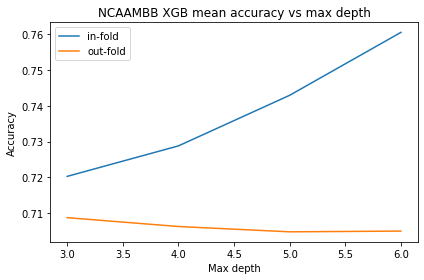

In [42]:
in_fold_md_summary = xgb_results[(xgb_results['min_samples_split'] == min_samples_split_opt) &
                                 (xgb_results['learning_rate'] == learning_rate_opt)].groupby(['max_depth'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['max_depth'], ascending = True)
out_fold_md_summary = xgb_results[(xgb_results['min_samples_split'] == min_samples_split_opt) &
                                  (xgb_results['learning_rate'] == learning_rate_opt)].groupby(['max_depth'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['max_depth'], ascending = True)

fig, ax = plt.subplots()

ax.set_xlabel("Max depth")
ax.set_ylabel("Accuracy")
ax.set_title("NCAAMBB XGB mean accuracy vs max depth")
ax.plot(max_depths,
        in_fold_md_summary['mean'],
        label = "in-fold")
ax.plot(max_depths,
        out_fold_md_summary['mean'],
        label = "out-fold")
ax.legend()

fig.tight_layout()

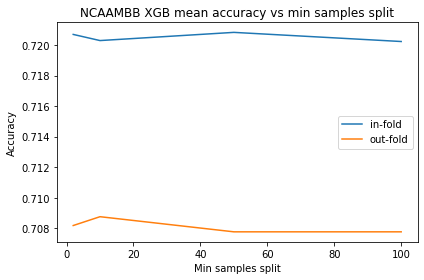

In [43]:
in_fold_mss_summary = xgb_results[(xgb_results['max_depth'] == max_depth_opt) &
                                 (xgb_results['learning_rate'] == learning_rate_opt)].groupby(['min_samples_split'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['min_samples_split'], ascending = True)
out_fold_mss_summary = xgb_results[(xgb_results['max_depth'] == max_depth_opt) &
                                  (xgb_results['learning_rate'] == learning_rate_opt)].groupby(['min_samples_split'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['min_samples_split'], ascending = True)


fig, ax = plt.subplots()

ax.set_xlabel("Min samples split")
ax.set_ylabel("Accuracy")
ax.set_title("NCAAMBB XGB mean accuracy vs min samples split")
ax.plot(min_samples_splits,
        in_fold_mss_summary['mean'],
        label = "in-fold")
ax.plot(min_samples_splits,
        out_fold_mss_summary['mean'],
        label = "out-fold")
ax.legend()

fig.tight_layout()

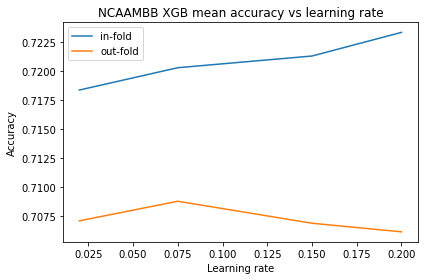

In [44]:
in_fold_lr_summary = xgb_results[(xgb_results['max_depth'] == max_depth_opt) &
                                 (xgb_results['min_samples_split'] == min_samples_split_opt)].groupby(['learning_rate'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['learning_rate'], ascending = True)
out_fold_lr_summary = xgb_results[(xgb_results['max_depth'] == max_depth_opt) &
                                  (xgb_results['min_samples_split'] == min_samples_split_opt)].groupby(['learning_rate'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['learning_rate'], ascending = True)

fig, ax = plt.subplots()

ax.set_xlabel("Learning rate")
ax.set_ylabel("Accuracy")
ax.set_title("NCAAMBB XGB mean accuracy vs learning rate")
ax.plot(learning_rates,
        in_fold_lr_summary['mean'],
        label = "in-fold")
ax.plot(learning_rates,
        out_fold_lr_summary['mean'],
        label = "out-fold")
ax.legend()

fig.tight_layout()

## Training size

In [45]:
xgb_train_sizes = []
xgb_train_size_train_scores = []
xgb_train_size_test_scores = []
xgb_train_size_train_time = []
xgb_train_size_score_time = []

iter = 0
train_sizes = np.linspace(.05,.95, 19)
for train_size in train_sizes:
    (train_features_train_size, test_features_train_size,
    train_response_train_size, test_response_train_size) = train_test_split(ncaa_all_features,
                                                                            ncaa_all_response,
                                                                            train_size = train_size,
                                                                            random_state = 28)
    (train_features_train_size, test_features_train_size,
    train_response_train_size, test_response_train_size) = train_test_split(ncaa_all_features,
                                                                            ncaa_all_response,
                                                                            train_size = train_size,
                                                                            random_state = 28)
    
    iter = iter + 1
    print("iter:", iter,
          " | train size:", train_size)
    xgb_train_size = GradientBoostingClassifier(loss = 'exponential', #deviance, exponential,
                                                       learning_rate = learning_rate_opt,
                                                       n_estimators = 500,
                                                       subsample = 1.0,
                                                       criterion = 'friedman_mse',
                                                       min_samples_split = min_samples_split_opt,
                                                       min_samples_leaf = 1,
                                                       min_weight_fraction_leaf = 0.0,
                                                       max_depth = max_depth_opt,
                                                       min_impurity_decrease = 0.0,
                                                       min_impurity_split = None,
                                                       init = None,
                                                       random_state = 28,
                                                       max_features = None,
                                                       #verbose = 1,
                                                       max_leaf_nodes = None,
                                                       warm_start = False,
                                                       #presort = 'auto',
                                                       validation_fraction = 0.1,
                                                       n_iter_no_change = 25,
                                                       #tol = 0.0001
                                                      )
    
    start = time.time()
    xgb_train_size.fit(train_features_train_size, train_response_train_size)
    end = time.time()
    xgb_train_size_train_time.append(end - start)
    
    xgb_train_sizes.append(xgb_train_size)
    
    start = time.time()
    xgb_train_size_train_scores.append(xgb_train_size.score(train_features_train_size, train_response_train_size)) 
    end = time.time()
    xgb_train_size_score_time.append(end - start)

    xgb_train_size_test_scores.append(xgb_train_size.score(test_features_train_size, test_response_train_size))

iter: 1  | train size: 0.05
iter: 2  | train size: 0.1
iter: 3  | train size: 0.15
iter: 4  | train size: 0.2
iter: 5  | train size: 0.25
iter: 6  | train size: 0.3
iter: 7  | train size: 0.35
iter: 8  | train size: 0.39999999999999997
iter: 9  | train size: 0.44999999999999996
iter: 10  | train size: 0.49999999999999994
iter: 11  | train size: 0.5499999999999999
iter: 12  | train size: 0.6
iter: 13  | train size: 0.65
iter: 14  | train size: 0.7
iter: 15  | train size: 0.75
iter: 16  | train size: 0.7999999999999999
iter: 17  | train size: 0.85
iter: 18  | train size: 0.9
iter: 19  | train size: 0.95


### Plotting the learning curve by training size, for the optimal hyperparameters

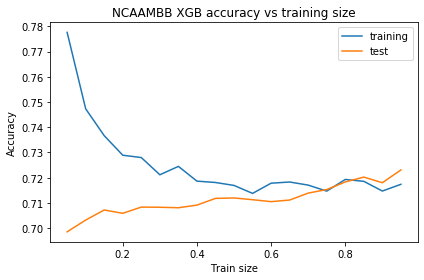

In [49]:
fig, ax = plt.subplots()
ax.set_xlabel("Train size")
ax.set_ylabel("Accuracy")
ax.set_title("NCAAMBB XGB accuracy vs training size")
ax.plot(train_sizes, xgb_train_size_train_scores, label = "training",
        #drawstyle = "steps-post"
       )
ax.plot(train_sizes, xgb_train_size_test_scores, label = "test",
        #drawstyle = "steps-post"
       )
ax.legend()
fig.tight_layout()

###  Plotting the model fitting time as a function of the training size

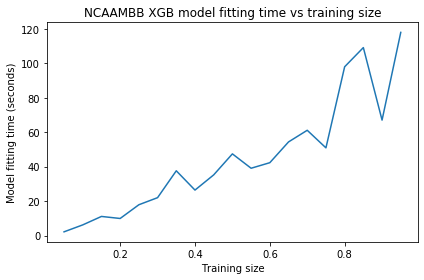

In [50]:
fig, ax = plt.subplots()

ax.set_xlabel("Training size")
ax.set_ylabel("Model fitting time (seconds)")
ax.set_title("NCAAMBB XGB model fitting time vs training size")
ax.plot(train_sizes, xgb_train_size_train_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()

### Plotting the model scoring time as a function of the training size

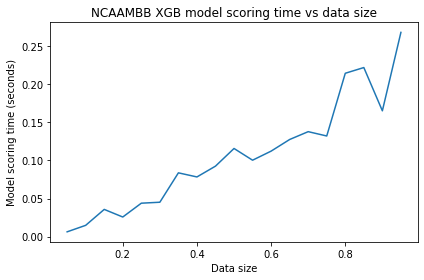

In [51]:
fig, ax = plt.subplots()

ax.set_xlabel("Data size")
ax.set_ylabel("Model scoring time (seconds)")
ax.set_title("NCAAMBB XGB model scoring time vs data size")
ax.plot(train_sizes, xgb_train_size_score_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()